# Cancer Classification using Gene Expression
Author: Nishant Nuthalapati

Course Project, UC Irvine, Math 10, Spring 25

I would like to post my notebook on the course's website. Yes

# **Introduction**

This dataset was taken from Kaggle. It is part of a paper from 1999 from (Golub et al.). It was a proof of concept paper showing how gene expression could be used to classify the type of Leukemia a patient had. The two types of Leukemia are Acute Myeloid Leukemia (AML) or Acute Lymphoblastic Leukemia (ALL).

This dataset consist of 3 files. The first file simply contains the label of either type of Leukimia for each patient. The other two files contain the ~7000 gene expressions for each patient split into two files.

# **Overview**
**The purpose of this notebook is to explore the Gene expression dataset (Golub et al.) from Kaggle and see if it is possible to predict wether someone has cancer based on their gene expressions.**

----It is important to note that my understanding of the scientific relationships between the genes is limited. -----

The first step is to import that data as well as other packages which will be useful in analyzing the data

In [49]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Feature Explanations**

Gene Description - Describes the gene

Gene Accession number - Unique Identifer for the gene


1-72 - The unique id for the patients in the study


call (A/M/P) - Is a prediction on whether the gene is present on the preceding column. A - Absent, P - Present, M - Marginal


The structure is such that the gene features are row-wise instead of column wise. So each patient column has **scaled** numerical values that correspond to the gene row.

In [50]:
#import the data and initialize the dataframes
labels = pd.read_csv('/content/actual.csv')
test = pd.read_csv('/content/data_set_ALL_AML_independent.csv')
train = pd.read_csv('/content/data_set_ALL_AML_train.csv')

print("Labels:", labels.shape)
print("Test:", test.shape)
print("Train:", train.shape)

Labels: (72, 2)
Test: (7129, 70)
Train: (7129, 78)


# **PreProcessing**

Preprocess the data by dropping the call columns since they are based on the significance of the gene expression value. It is based on a p value used by the machine that reads the expression which is based on the expression value already. We will also drop the Gene description and Gene Accession Number since those columns simply identify the gene.

In [51]:
print(train.columns)
print(test.columns)
# Drop all the call columns
train_columns_to_drop  = [col for col in train.columns if 'call' in col]
train = train.drop(train_columns_to_drop, axis=1)

test_columns_to_drop = [col for col in test.columns if 'call' in col]
test = test.drop(test_columns_to_drop, axis=1)

#Drop gene description and gene accession number
train = train.drop(columns=['Gene Description', 'Gene Accession Number'], axis=1)
test = test.drop(columns=['Gene Description', 'Gene Accession Number'], axis=1)

print('After Dropping Columns:')
print(train.columns)
print(test.columns)


Index(['Gene Description', 'Gene Accession Number', '1', 'call', '2', 'call.1',
       '3', 'call.2', '4', 'call.3', '5', 'call.4', '6', 'call.5', '7',
       'call.6', '8', 'call.7', '9', 'call.8', '10', 'call.9', '11', 'call.10',
       '12', 'call.11', '13', 'call.12', '14', 'call.13', '15', 'call.14',
       '16', 'call.15', '17', 'call.16', '18', 'call.17', '19', 'call.18',
       '20', 'call.19', '21', 'call.20', '22', 'call.21', '23', 'call.22',
       '24', 'call.23', '25', 'call.24', '26', 'call.25', '27', 'call.26',
       '34', 'call.27', '35', 'call.28', '36', 'call.29', '37', 'call.30',
       '38', 'call.31', '28', 'call.32', '29', 'call.33', '30', 'call.34',
       '31', 'call.35', '32', 'call.36', '33', 'call.37'],
      dtype='object')
Index(['Gene Description', 'Gene Accession Number', '39', 'call', '40',
       'call.1', '42', 'call.2', '47', 'call.3', '48', 'call.4', '49',
       'call.5', '41', 'call.6', '43', 'call.7', '44', 'call.8', '45',
       'call.9', '46', 

We also need to change the labels test set from ALL and AML to 1 and 0 respectively. ALL and AML are short for Acute Myeloid Leukemia (AML) or Acute Lymphoblastic Leukemia (ALL). We also need to split the label dataframe into the train and test set since. Luckily, the id allows us to keep track of the correct labels.

In [52]:
#switch the ALL and AML labels to 1 and 0
print(labels.head)
labels['cancer'] = labels['cancer'].apply(lambda x: 1 if x == 'ALL' else 0)
print(labels.head())

#split into training and test label sets
train_labels = labels[labels.index<=37]
test_labels = labels[labels.index>37]
print(train_labels.shape)
print(test_labels.shape)

<bound method NDFrame.head of     patient cancer
0         1    ALL
1         2    ALL
2         3    ALL
3         4    ALL
4         5    ALL
..      ...    ...
67       68    ALL
68       69    ALL
69       70    ALL
70       71    ALL
71       72    ALL

[72 rows x 2 columns]>
   patient  cancer
0        1       1
1        2       1
2        3       1
3        4       1
4        5       1
(38, 2)
(34, 2)


mean is :  -7.475200614673518e-18
std is : 1.0


Text(0, 0.5, 'frequency')

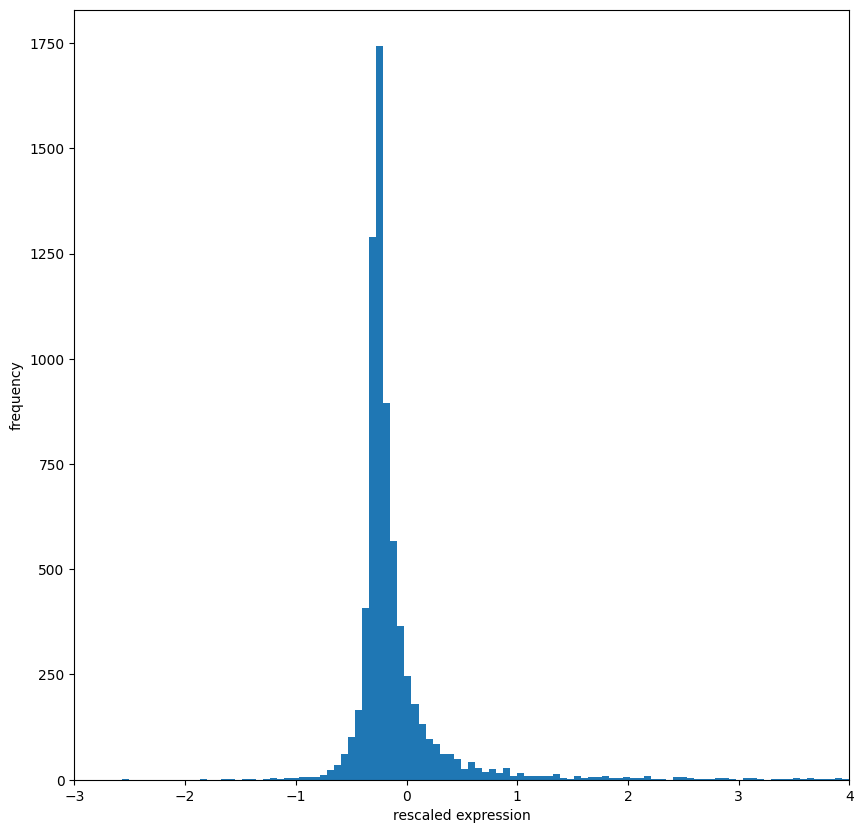

In [53]:
#Standardize gene expression values

from sklearn import preprocessing
train_std = preprocessing.StandardScaler().fit_transform(train)
test_std = preprocessing.StandardScaler().fit_transform(test)

gene_index = 1
print('mean is : ',  np.mean(train_std[:, gene_index] ) )
print('std is :', np.std(train_std[:, gene_index]))

fig= plt.figure(figsize=(10,10))
plt.hist(train_std[:, gene_index], bins=300)
plt.xlim((-3, 4))
plt.xlabel('rescaled expression')
plt.ylabel('frequency')


# **Principle Component Analysis**
Since we want to predict which kind of Leukemia the patient has and there are 7000+ gene features, we can perform PCA to reduce them while still keeping the variation.

[0.16108456 0.29808534 0.41780357 0.49249473 0.55327027 0.60074497
 0.63731948 0.66960381 0.69847991 0.72294316 0.74568246 0.76657397
 0.7844028  0.80178013 0.81782994 0.83333846 0.84717549 0.86031601
 0.87313565 0.88423305 0.89487168 0.90491241 0.91447028 0.92334524
 0.9320217  0.9401845  0.9481476  0.95557245]


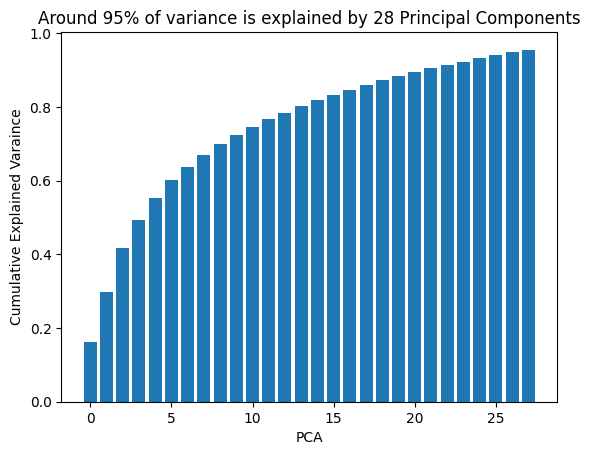

In [54]:
#perform PCA on train set
from sklearn.decomposition import PCA

train = train.T
num_components = 28
pca = PCA(n_components= num_components)
train_pca = pca.fit_transform(train)

print(pca.explained_variance_ratio_.cumsum())

fig = plt.figure()
plt.bar(range(num_components), pca.explained_variance_ratio_.cumsum())
plt.xlabel('PCA')
plt.ylabel('Cumulative Explained Varaince')
plt.title("Around 95% of variance is explained by 28 Principal Components")
plt.show()

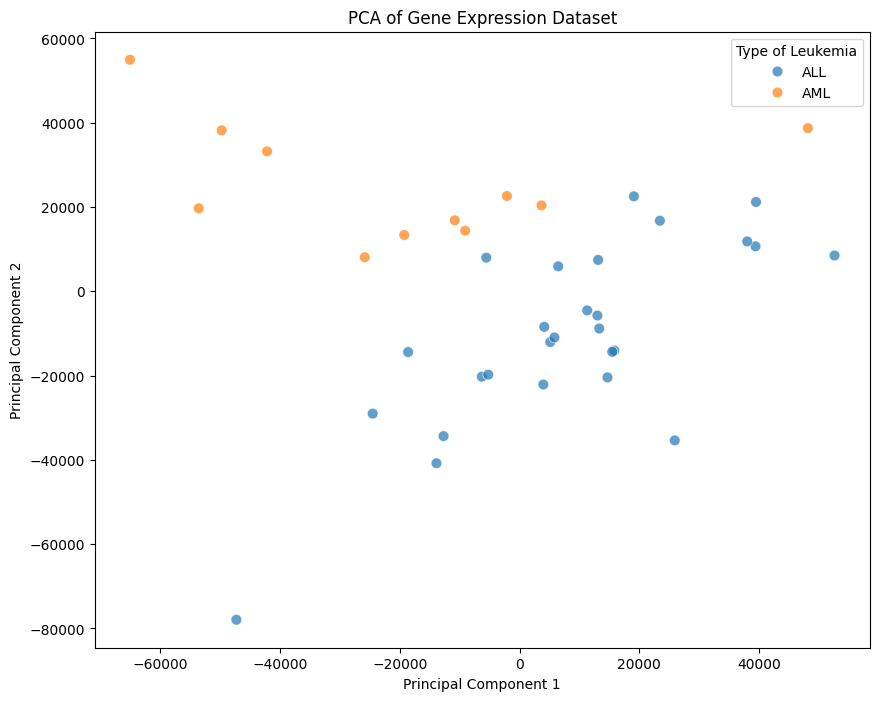

In [55]:
#plot the PCA for the training set
plt.figure(figsize=(10, 8))
y = train_labels['cancer']
y_labels_str = y.map({0: 'AML', 1: 'ALL'})
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=y_labels_str, legend='full', s=60, alpha=0.7, palette='tab10')
plt.title('PCA of Gene Expression Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Type of Leukemia')
plt.show()

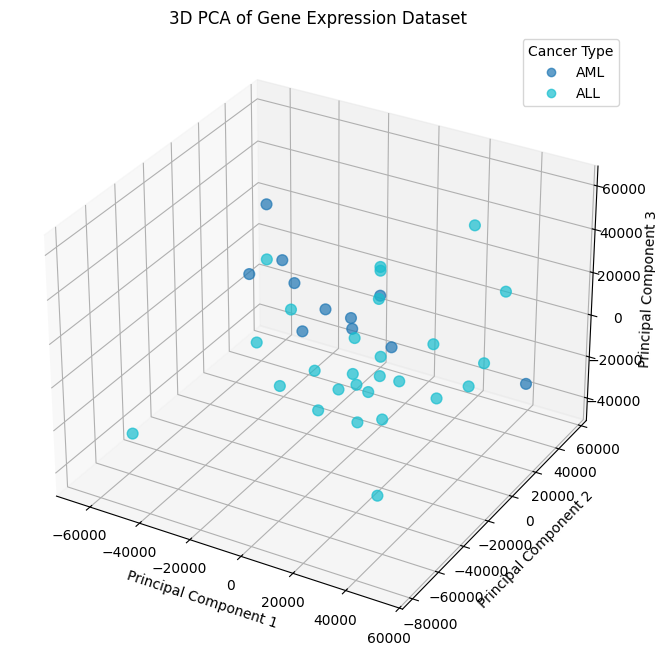

In [56]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
y = train_labels['cancer']

# use the 3D scatter plot
# we use the first three principal components for the x, y, and z axes
scatter = ax.scatter(train_pca[:, 0], train_pca[:, 1], train_pca[:, 2], c=y, cmap='tab10', s=60, alpha=0.7)

ax.set_title('3D PCA of Gene Expression Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# add a legend
# get the handles and labels from the scatter plot
handles, _ = scatter.legend_elements(prop="colors", num="auto")
# manually define the labels for the legend
labels = ['AML', 'ALL'] # Assuming 0 corresponds to AML and 1 corresponds to ALL

# create the legend using the generated handles and the custom labels
ax.legend(handles, labels, title="Cancer Type")

plt.show()

# **Prediction Using Different Classifying Techniques**

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# apply the same PCA  to the test set
test = test.T
test_pca = pca.transform(test)

# initialize and train the logistic regression model
model = LogisticRegression(random_state=0)
model.fit(train_pca, train_labels['cancer'])

# predict on the test set
predictions = model.predict(test_pca)

# evaluate the model
accuracy = accuracy_score(test_labels['cancer'], predictions)
report = classification_report(test_labels['cancer'], predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.57      0.48        14
           1       0.60      0.45      0.51        20

    accuracy                           0.50        34
   macro avg       0.51      0.51      0.50        34
weighted avg       0.53      0.50      0.50        34



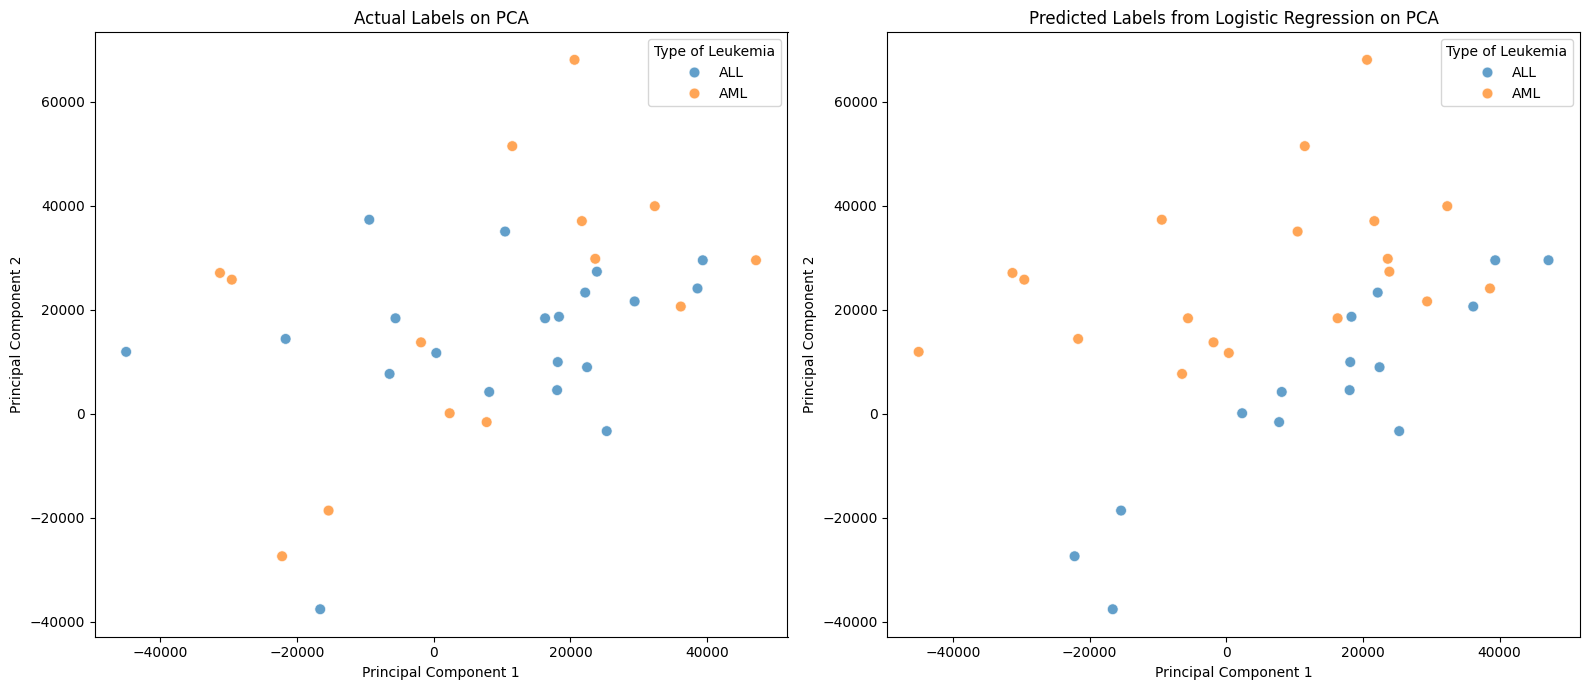

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# plot actual labels
sns.scatterplot(ax=axes[0], x=test_pca[:, 0], y=test_pca[:, 1], hue=test_labels['cancer'].map({0: 'AML', 1: 'ALL'}),
                legend='full', s=60, alpha=0.7, palette='tab10')
axes[0].set_title('Actual Labels on PCA')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(title='Type of Leukemia')

# plot predicted labels
predictions_series = pd.Series(predictions.flatten())
sns.scatterplot(ax=axes[1], x=test_pca[:, 0], y=test_pca[:, 1], hue=predictions_series.map({0: 'AML', 1: 'ALL'}),
                legend='full', s=60, alpha=0.7, palette='tab10')
axes[1].set_title('Predicted Labels from Logistic Regression on PCA')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend(title='Type of Leukemia')

plt.tight_layout()
plt.show()

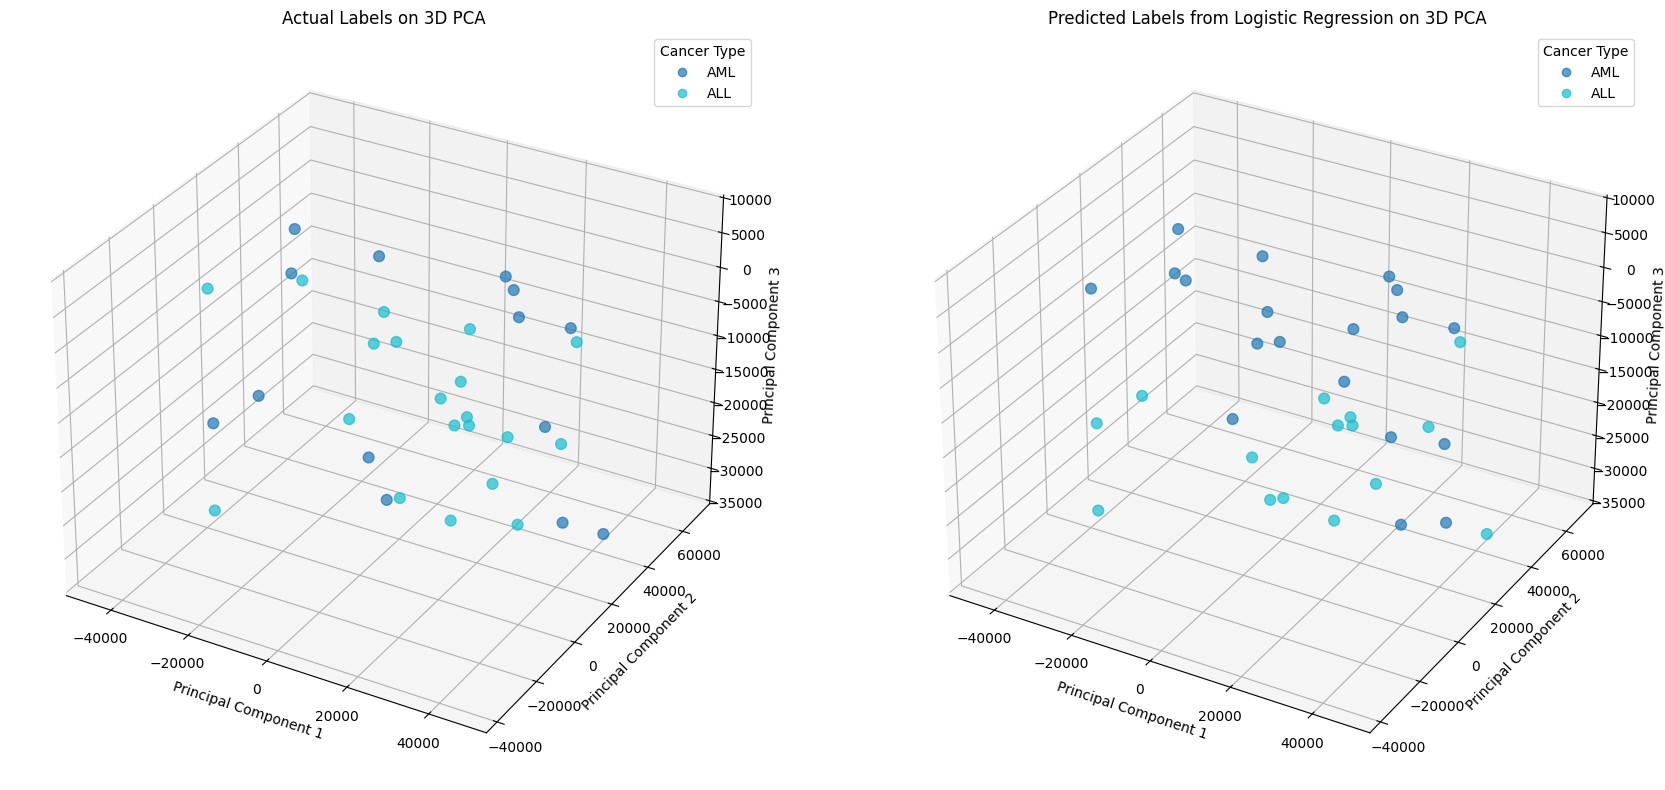

In [59]:
fig = plt.figure(figsize=(18, 8))

# create the first subplot for actual labels
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# plot actual labels
scatter1 = ax1.scatter(test_pca[:, 0], test_pca[:, 1], test_pca[:, 2], c=test_labels['cancer'], cmap='tab10', s=60, alpha=0.7)

ax1.set_title('Actual Labels on 3D PCA')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')

# add a legend for actual labels
handles1, _ = scatter1.legend_elements(prop="colors", num="auto")
labels1 = ['AML', 'ALL']
ax1.legend(handles1, labels1, title="Cancer Type")

# create the second subplot for predicted labels
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# plot predicted labels
predictions_series = pd.Series(predictions.flatten())
scatter2 = ax2.scatter(test_pca[:, 0], test_pca[:, 1], test_pca[:, 2], c=predictions_series, cmap='tab10', s=60, alpha=0.7)

ax2.set_title('Predicted Labels from Logistic Regression on 3D PCA')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')

# add a legend for predicted labels
handles2, _ = scatter2.legend_elements(prop="colors", num="auto")
labels2 = ['AML', 'ALL']
ax2.legend(handles2, labels2, title="Cancer Type")

plt.tight_layout()
plt.show()

As we can see performing a binary classification using logistic regression does not work that well. This might be because linear models do not accurately represent the underlying relationships. Let us try a logistic regression with nonlinear features.

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report

# generate polynomial features for the training data
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
train_pca_poly = poly.fit_transform(train_pca)

# generate polynomial features for the test data using the same fitted object
test_pca_poly = poly.transform(test_pca)

# initialize and train the Logistic Regression model on polynomial features
model_poly = LogisticRegression(random_state=0, max_iter=1000)
model_poly.fit(train_pca_poly, train_labels['cancer'])

# predict on the test set with polynomial features
predictions_poly = model_poly.predict(test_pca_poly)

# evaluate the model
accuracy_poly = accuracy_score(test_labels['cancer'], predictions_poly)
report_poly = classification_report(test_labels['cancer'], predictions_poly)

print(f"Accuracy with Polynomial Features (degree={degree}): {accuracy_poly}")
print("Classification Report with Polynomial Features:")
print(report_poly)

Accuracy with Polynomial Features (degree=2): 0.5588235294117647
Classification Report with Polynomial Features:
              precision    recall  f1-score   support

           0       0.44      0.29      0.35        14
           1       0.60      0.75      0.67        20

    accuracy                           0.56        34
   macro avg       0.52      0.52      0.51        34
weighted avg       0.54      0.56      0.54        34



It seems that by introducing nonlinear features we were able to marginally increase the accuracy of our model. However, it is still quite inaccurate since it is roughly 55% correct - meaning it is probably as good as a 50/50 guess. Let us now try some machine learning techniques to see if we can create a better model.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Accuracy with Neural Network: 0.6470588235294118
Classification Report with Neural Network:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60        14
           1       0.72      0.65      0.68        20

    accuracy                           0.65        34
   macro avg       0.64      0.65      0.64        34
weighted avg       0.66      0.65      0.65        34



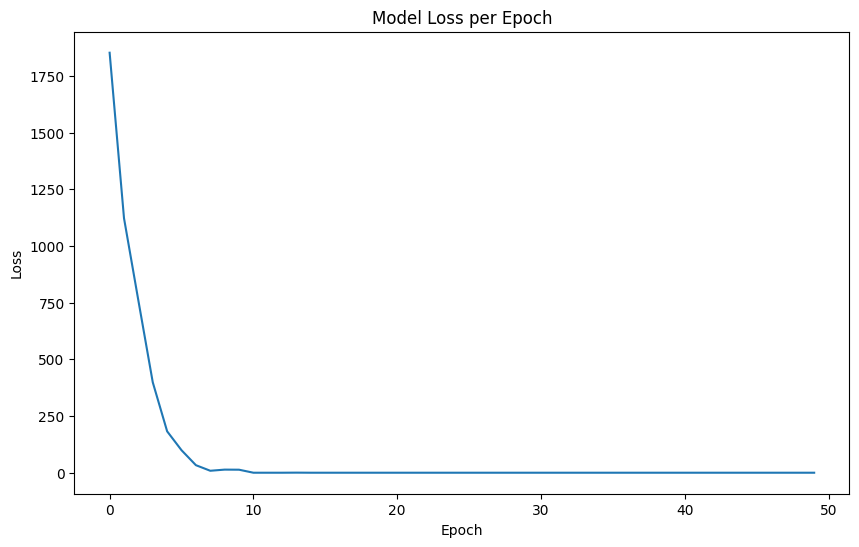

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# build the neural network model
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(train_pca.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# compile the model
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# train the model
history = model_nn.fit(train_pca, train_labels['cancer'], epochs=50, batch_size=16, verbose=0)

# predict on the test set
predictions_proba_nn = model_nn.predict(test_pca)
predictions_nn = (predictions_proba_nn > 0.5).astype("int32")

# evaluate the model
accuracy_nn = accuracy_score(test_labels['cancer'], predictions_nn)
report_nn = classification_report(test_labels['cancer'], predictions_nn)

print(f"Accuracy with Neural Network: {accuracy_nn}")
print("Classification Report with Neural Network:")
print(report_nn)

# plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

The neural network seemed to perform much better than the regression with an accuracy of 61%. However, this is still pretty low and unusable since an output from this model is still hard to trust if it is wrong 40% of the time. Let us try a tree based machine learning model.

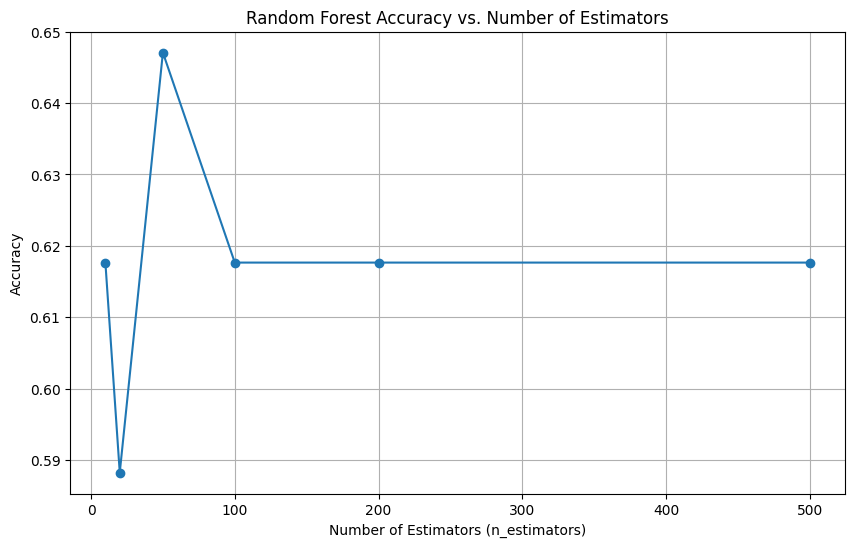

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# define a range of n_estimators values to test
n_estimators_range = [10, 20, 50, 100, 200, 500]
accuracy_scores = []

# iterate through the range of n_estimators
for n_estimators in n_estimators_range:
    # initialize and train the Random Forest classifier
    model_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    model_rf.fit(train_pca, train_labels['cancer'])

    # predict on the test set
    predictions_rf = model_rf.predict(test_pca)

    # evaluate the model and store the accuracy
    accuracy = accuracy_score(test_labels['cancer'], predictions_rf)
    accuracy_scores.append(accuracy)

# plot the accuracy vs. n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracy_scores, marker='o')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

The Random Forest Classifier also performed marginally better than the Neural netwrok with roughly 64.5% accuracy at 50 estimators (or branches).

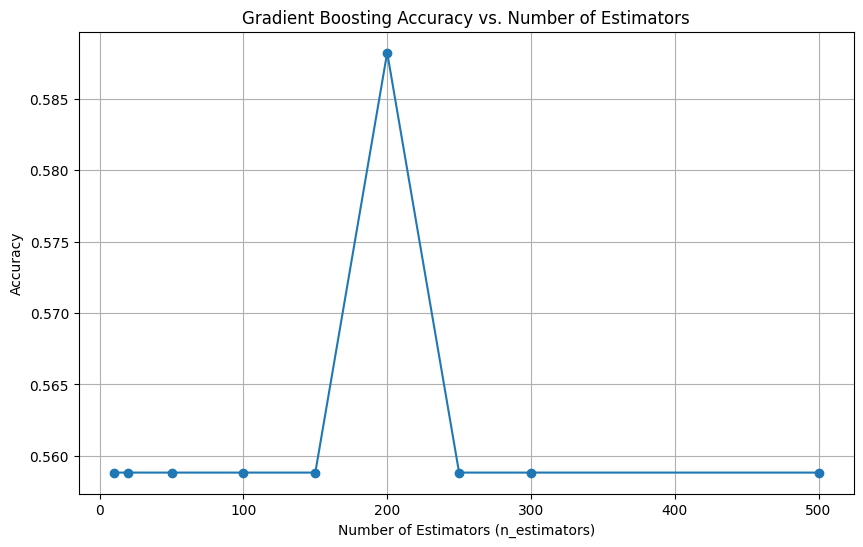

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# define a range of n_estimators values to test
n_estimators_range_gb = [10, 20, 50, 100, 150, 200, 250, 300, 500]
accuracy_scores_gb = []

# iterate through the range of n_estimators
for n_estimators in n_estimators_range_gb:
    # initialize and train the Gradient Boosting classifier
    model_gb = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.05, random_state=0)
    model_gb.fit(train_pca, train_labels['cancer'])

    # predict on the test set
    predictions_gb = model_gb.predict(test_pca)

    # evaluate the model and store the accuracy
    accuracy = accuracy_score(test_labels['cancer'], predictions_gb)
    accuracy_scores_gb.append(accuracy)

# plot the accuracy vs. n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range_gb, accuracy_scores_gb, marker='o')
plt.title('Gradient Boosting Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

#**Investigating the Cause of failure**

It seems that even with a Gradient Boosting Classifier the accuracy is around the same. Perhaps there is something different in the test set that is not represented in the training set. Let us take a sneak peek into the test set and see how it compares.

Test Stats for first gene:
mean is :  9.966934152898025e-18
std is : 1.0
Training Stats for first gene:
mean is :  -7.475200614673518e-18
std is : 1.0


Text(0, 0.5, 'frequency')

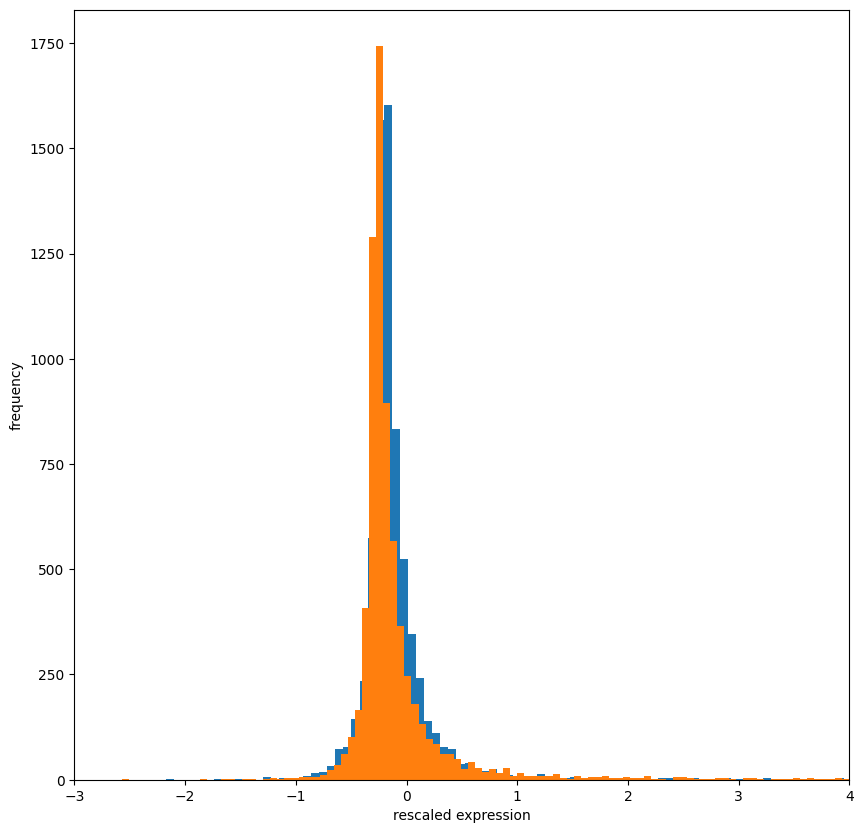

In [64]:
gene_index = 1
print('Test Stats for first gene:')
print('mean is : ',  np.mean(test_std[:, gene_index] ) )
print('std is :', np.std(test_std[:, gene_index]))

print('Training Stats for first gene:')
print('mean is : ',  np.mean(train_std[:, gene_index] ) )
print('std is :', np.std(train_std[:, gene_index]))

fig= plt.figure(figsize=(10,10))
plt.hist(test_std[:, gene_index], bins=300)
plt.hist(train_std[:, gene_index], bins=300)
plt.xlim((-3, 4))
plt.xlabel('rescaled expression')
plt.ylabel('frequency')

It seems like based no just the first gene that the distributions are very similiar. Maybe there one type of Leukemia ir overrepresented in the label. Let us take a look again at the raw labels.

<ipython-input-65-1360895525>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_label_counts.index.map({0: 'AML', 1: 'ALL'}), y=train_label_counts.values, ax=axes[0], palette='viridis')
<ipython-input-65-1360895525>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_label_counts.index.map({0: 'AML', 1: 'ALL'}), y=test_label_counts.values, ax=axes[1], palette='viridis')


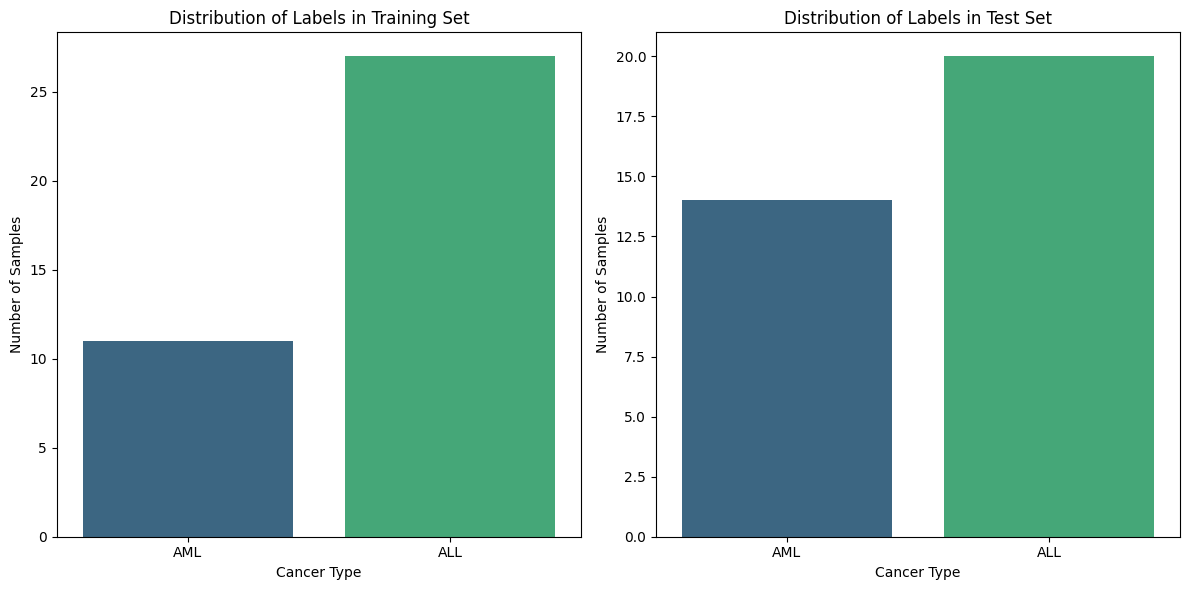

In [65]:
# count the occurrences of each label
train_label_counts = train_labels['cancer'].value_counts().sort_index()
test_label_counts = test_labels['cancer'].value_counts().sort_index()

# create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# plot the distribution for the training set
sns.barplot(x=train_label_counts.index.map({0: 'AML', 1: 'ALL'}), y=train_label_counts.values, ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Labels in Training Set')
axes[0].set_xlabel('Cancer Type')
axes[0].set_ylabel('Number of Samples')
axes[0].tick_params(axis='x', rotation=0)

# plot the distribution for the test set
sns.barplot(x=test_label_counts.index.map({0: 'AML', 1: 'ALL'}), y=test_label_counts.values, ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Labels in Test Set')
axes[1].set_xlabel('Cancer Type')
axes[1].set_ylabel('Number of Samples')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [66]:
# check the shapes of the dataframes
print("Train Labels Shape:", train_labels.shape)
print("Test Labels Shape:", test_labels.shape)

# check the content of the dataframes
print("\nTrain Labels:")
train_label_counts = train_labels['cancer'].value_counts()
print(train_label_counts)
print("\nTest Labels:")
test_label_counts = test_labels['cancer'].value_counts()
print(test_label_counts)

Train Labels Shape: (38, 2)
Test Labels Shape: (34, 2)

Train Labels:
cancer
1    27
0    11
Name: count, dtype: int64

Test Labels:
cancer
1    20
0    14
Name: count, dtype: int64


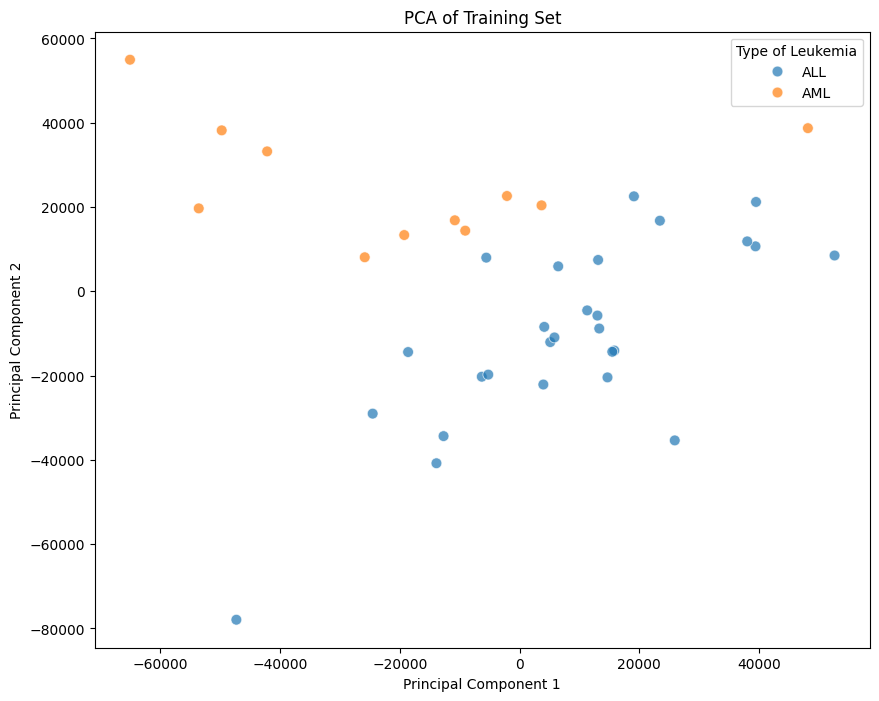

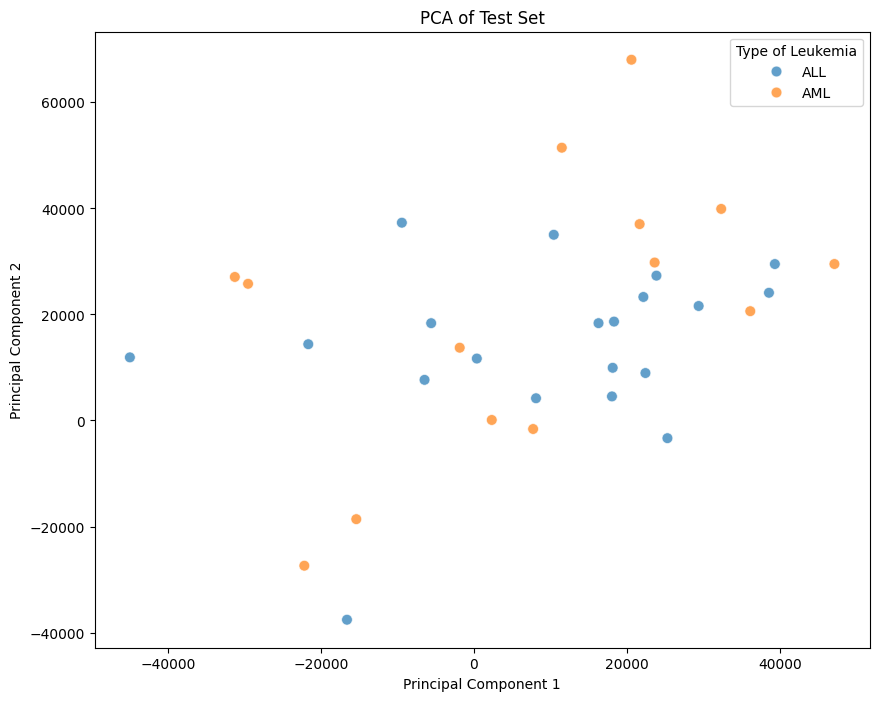

In [67]:
#plot the PCA for the training set
plt.figure(figsize=(10, 8))
y = train_labels['cancer']
y_labels_str = y.map({0: 'AML', 1: 'ALL'})
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=y_labels_str, legend='full', s=60, alpha=0.7, palette='tab10')
plt.title('PCA of Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Type of Leukemia')
plt.show()

#plot the PCA for the test set
plt.figure(figsize=(10, 8))
y = test_labels['cancer']
y_labels_str = y.map({0: 'AML', 1: 'ALL'})
sns.scatterplot(x=test_pca[:, 0], y=test_pca[:, 1], hue=y_labels_str, legend='full', s=60, alpha=0.7, palette='tab10')
plt.title('PCA of Test Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Type of Leukemia')
plt.show()

Aha! This is definitive proof that the distribution between the test and training set are different. This is because the PCA we fitted to the training set does not work on the test set. This suggests some kind of underlying different in the data structure.

# **Trying a New Approach**
Now that we have a better understanding of the cause. Let us try again except take into account the call columns. I do not think this will fix the issue because the underlying data has a different distribution - but let us see where it goes.

Let us try using this approach.

In [68]:
# load data
labels = pd.read_csv('/content/actual.csv')
test = pd.read_csv('/content/data_set_ALL_AML_independent.csv')
train = pd.read_csv('/content/data_set_ALL_AML_train.csv')

# change labels to numerical
labels['cancer'] = labels['cancer'].apply(lambda x: 1 if x == 'ALL' else 0)
train_labels = labels[labels.index<=37]
test_labels = labels[labels.index>37]

# if call is anything but Present change previous columns to 0
def apply_call_filter(df):
    """
    Filters gene expression values based on the corresponding 'call' column.
    Replaces expression values with 0 if the 'call' is not 'P'.
    Drops the 'call' column and identifier columns afterward.
    """
    # identify the patient columns and the call columns
    patient_cols = [col for col in df.columns if not any(id_col in col for id_col in ['Gene Description', 'Gene Accession Number', 'call'])]
    call_cols = [col for col in df.columns if 'call' in col]


    # apply the filter: for each patient column, check the corresponding call column
    for i, patient_col in enumerate(patient_cols):
        call_col = call_cols[i]
        # for each row set the patient value to 0 if the call value is not 'P'
        df[patient_col] = df.apply(
            lambda row: row[patient_col] if row[call_col] == 'P' else 0, axis=1
        )

    # drop unneccessary columns
    df = df.drop(columns=call_cols)
    df = df.drop(columns=['Gene Description', 'Gene Accession Number'], axis=1)

    return df

# apply the filtering function to both train and test sets
train_filtered = apply_call_filter(train)
test_filtered = apply_call_filter(test)

print("Shape after filtering and dropping columns:")
print("Train:", train_filtered.shape)
print("Test:", test_filtered.shape)

# transpose dataframes
train_filtered = train_filtered.T
test_filtered = test_filtered.T

print("Shape after transposing:")
print("Train:", train_filtered.shape)
print("Test:", test_filtered.shape)

Shape after filtering and dropping columns:
Train: (7129, 38)
Test: (7129, 34)
Shape after transposing:
Train: (38, 7129)
Test: (34, 7129)


In [69]:
# standardize both training and test sets
train_scaler = preprocessing.StandardScaler()
test_scaler = preprocessing.StandardScaler()
train_scaled = train_scaler.fit_transform(train_filtered)
test_scaled = test_scaler.fit_transform(test_filtered)

train_scaled_df = pd.DataFrame(train_scaled, index=train_filtered.index, columns=train_filtered.columns)
test_scaled_df = pd.DataFrame(test_scaled, index=test_filtered.index, columns=test_filtered.columns)

Shape after PCA:
Train PCA: (38, 28)
Test PCA: (34, 28)


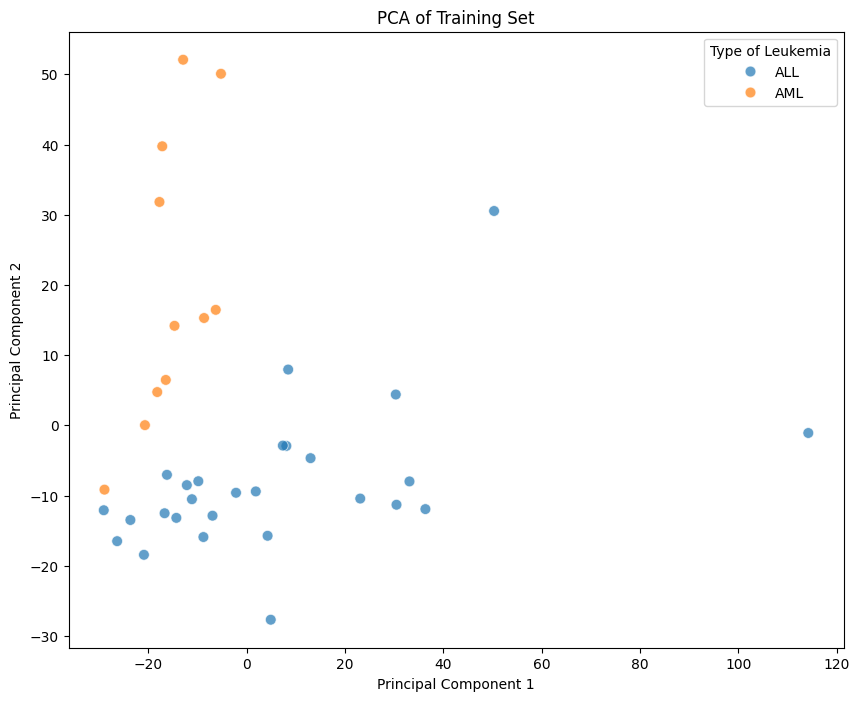

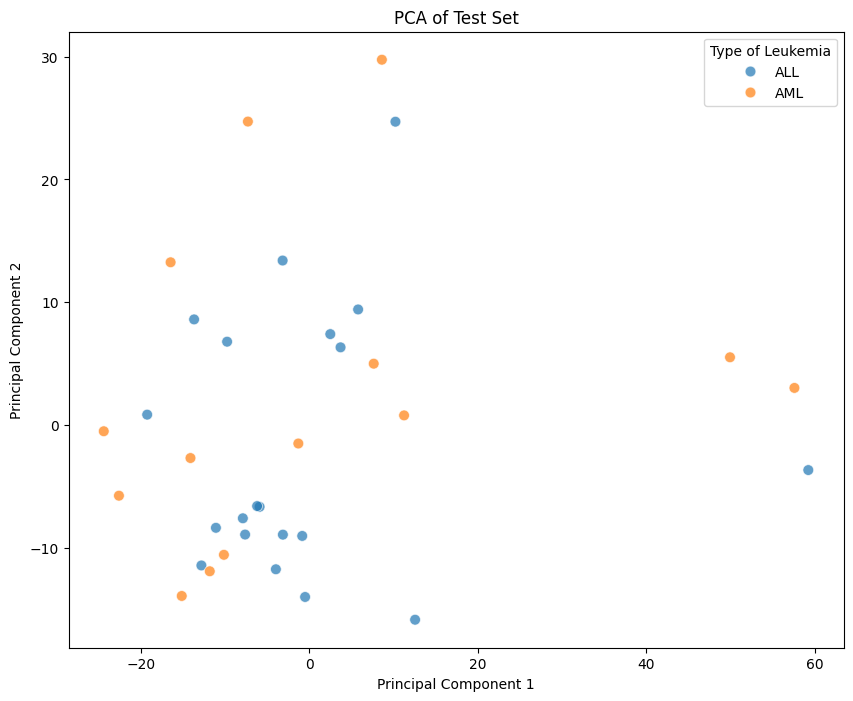

In [70]:
# do pca on the training set
num_components = 28
pca = PCA(n_components=num_components)
train_pca = pca.fit_transform(train_scaled_df)

# apply the same PCA transformation to the test set
test_pca = pca.transform(test_scaled_df)

print("Shape after PCA:")
print("Train PCA:", train_pca.shape)
print("Test PCA:", test_pca.shape)

# graph for the training set
plt.figure(figsize=(10, 8))
y = train_labels['cancer']
y_labels_str = y.map({0: 'AML', 1: 'ALL'})
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=y_labels_str, legend='full', s=60, alpha=0.7, palette='tab10')
plt.title('PCA of Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Type of Leukemia')
plt.show()

#graph for the test set
plt.figure(figsize=(10, 8))
y = test_labels['cancer']
y_labels_str = y.map({0: 'AML', 1: 'ALL'})
sns.scatterplot(x=test_pca[:, 0], y=test_pca[:, 1], hue=y_labels_str, legend='full', s=60, alpha=0.7, palette='tab10')
plt.title('PCA of Test Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Type of Leukemia')
plt.show()

**As expected the PCA is still random within the test set.**

In [71]:
from sklearn.metrics import confusion_matrix
# initialize the logistic regression
model = LogisticRegression(random_state=0)

# train the model
model.fit(train_pca, train_labels['cancer'])

# predict on the test set
predictions = model.predict(test_pca)

# evaluate the model
accuracy = accuracy_score(test_labels['cancer'], predictions)
report = classification_report(test_labels['cancer'], predictions)

print(f"Accuracy with Logistic Regression (filtered data, class_weight='balanced'): {accuracy}")
print("Classification Report with Logistic Regression (filtered data, class_weight='balanced'):")
print(report)

# confusion Matrix
conf_matrix = confusion_matrix(test_labels['cancer'], predictions)
print("\nConfusion Matrix (filtered data):")
print(conf_matrix)

Accuracy with Logistic Regression (filtered data, class_weight='balanced'): 0.5588235294117647
Classification Report with Logistic Regression (filtered data, class_weight='balanced'):
              precision    recall  f1-score   support

           0       0.43      0.21      0.29        14
           1       0.59      0.80      0.68        20

    accuracy                           0.56        34
   macro avg       0.51      0.51      0.48        34
weighted avg       0.53      0.56      0.52        34


Confusion Matrix (filtered data):
[[ 3 11]
 [ 4 16]]


In [72]:
model_gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=10, random_state=42)

# train the model
model_gb.fit(train_pca, train_labels['cancer']) # Train on PCA-transformed filtered data

# predict on the test set
predictions_gb = model_gb.predict(test_pca)

# evaluate the model
accuracy_gb = accuracy_score(test_labels['cancer'], predictions_gb)
report_gb = classification_report(test_labels['cancer'], predictions_gb)
conf_matrix_gb = confusion_matrix(test_labels['cancer'], predictions_gb)


print(f"Accuracy with Gradient Boosting Classifier (filtered data): {accuracy_gb}")
print("Classification Report with Gradient Boosting Classifier (filtered data):")
print(report_gb)
print("\nConfusion Matrix (Gradient Boosting, filtered data):")
print(conf_matrix_gb)

Accuracy with Gradient Boosting Classifier (filtered data): 0.5588235294117647
Classification Report with Gradient Boosting Classifier (filtered data):
              precision    recall  f1-score   support

           0       0.43      0.21      0.29        14
           1       0.59      0.80      0.68        20

    accuracy                           0.56        34
   macro avg       0.51      0.51      0.48        34
weighted avg       0.53      0.56      0.52        34


Confusion Matrix (Gradient Boosting, filtered data):
[[ 3 11]
 [ 4 16]]


# **Conclusion**

Although we were not able to create a model that could accurately classify the type of Leukemia in a patient based on their gene expression, this notebook presented an opportunity to explore the dataset using techniques I learned throughout the quarter.

I suspect this is because there is not enough data/ the data is not diverse enough to make any meaningful predictions.

In this notebook we preprocessed the data by dropping unneccesary columns, splitting it into test and training, as well as transposing it. We also performed dimension reduction using PCA down to 28 components which accounted for roughly 95% of variance. From there we tested different classification techniques such as logistic regression, neural networks, and a Gradient Boosted Classifier. However, when those didn't work I investigated the cause by comparing the distribution between the test and training set. I then redid my analysis but took into account the 'call' column which did not yield significant results.

# **Sources**

Data - https://www.kaggle.com/datasets/crawford/gene-expression

Graphs (referenced the documentation ) - https://seaborn.pydata.org/

Gradient Boosted Classifier - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

Understanding the call column - https://www.kaggle.com/datasets/crawford/gene-expression/discussion/120087

Chatgpt - In creating boilerplate code for the graphs.
